# NoSuchAnsible

`
    Author:
       Dan Kaminsky   
       Chief Scientist
       https://whiteops.com
`

TL,DR:  Maybe the EMDrive works because of lag.  Specifically, it's difficult to have equal and opposite reactions under precisely controlled relativistic conditions given a force that can operate at long distances but change force vectors faster than light over them.

Magnetism qualifies.

Such chicanery may not require magic lab gear, instead if a RF transmitter and receiver also generate kinetic electromagnetic forces between one another as a side effect of RF induced electrical oscillation, then the fact that they're conveniently 1.5x the transmitted wavelength apart means their speed of light delayed phase differential will lead to the receiver being repelled and the transmitter being attracted.

This is all highly unlikely.  *BUT*.

If it does work, the worst we lose is the "opposite" portion of Newton's third law.  That's a lot better than losing conservation of energy, or achieving FTL (an Ansible being a device that allows communication Faster than Light).

And Elon goes to Mars.

# THE IMAGE

Here's what has me excited.  It shows achieving the system's cleanest thrust vector, only at the specified dimensions and frequencies (well, relative to immediate neighboring options).

![Whoa](http://i.imgur.com/OrplG9s.png "")

# WARNING/NOTICE/CAVEAT/CHILL OUT, IT'S A GEDANKENEXPERIMENT 

If anything in this notebook ends up accurate, please quote the following:  "Nobody was more surprised that his musings were accurate, than Kaminsky himself."  People are acting like theory is more important than experiment.  No, when theory disagrees with reality, reality wins.  (Damnit.)  People are also acting like if any part of physics is wrong, the entire enterprise has failed.  No, we discover new stuff in physics *all the time*, relativity and quantum mechanics in particular need lots of rectification, there's unexplained connections and shared constants all over the place, etc.

Honestly, I'm writing this document for a couple of reasons:

1. It's fun.  Remember when we did things for fun?
2. I need to learn Jupyter for some other work I'm doing, and this was a good reason to.
3. I actually had these concepts vetted a while back, and the strongest pushback I got was to do the math.  OK!
4. (The most important) The existence of an incorrect idea, that doesn't break all of physics, might goad someone into making a more rigorous concept that does explain experimental evidence.  Or, perhaps, the expansion of this limited 1D exploration into a fully simulated 3D scenario will either explain what's happening, or show where error might be coming from.

If you've got a better idea, good :)  If this angers you, you're entirely missing the point.

# The Situation

For every action, there's an equal and opposite reaction.  Newton's Third Law.  The opposite is supposed to be true:  If there is no equal and opposite reaction, there cannot be an action.  Basically, if you're sitting in space, and you're not firing any rockets, and not emitting any photons, you're not going anywhere (or, more accurately, you aren't changing the speed or direction of your motion).

Now, you might be able to catch a lift on some passing solar particles or photons, or maybe you can fire very small but extremely fast ions out the back, as an alternative to giant piles of fuel.  But, don't think for a moment you're ... just going to convert that nice nuclear thermopile directly into kinetic energy.  The universe doesn't work like that.

Or does it?  There's this engine, the EMDrive.  It doesn't emit anything.  It's "just" a big antenna firing at a smaller antenna, 22.7cm away, in sort of a funnel shaped container.  It apparently generates a non-trivial amount of thrust -- about what you'd get from a penny on a surface, but constant, and in space, that's enormous.

It's also enormously impossible, in theory.  In practice, experimentally, damn thing keeps working.  This just passed peer review:  [Measurement of Impulsive Thrust from a Closed Radio-Frequency Cavity in Vacuum](http://arc.aiaa.org/doi/10.2514/1.B36120) .

People are sort of freaking out.  This is silly.  There are many possible explanations that don't break all of physics.  Here's one, almost certainly incorrect.

# The Concept

You fire a shotgun.  The shot goes out, the gun goes in, hopefully into a well prepared shoulder.  Action, equal and opposite reaction.  Pretty much every kinetic interaction ultimately reduces to two things interacting, in extremely close proximity (nanometers), with the result being an equal and opposite distribution of forces.

Gravity is one exception.  It can operate over enormous distance.  What it can't do -- or at least, what we can't do to it -- is turn it on and off.  It's just a factor of what degree of mass is where.

So in general, most kinetic forces are easily modulated, but ultimately local, or not very local at all, but impossible to modulate.

And then there's magnets.

![OmNomNom](http://i.imgur.com/dKNnxVw.png "")

It's not merely that they can exert significant force at nontrivial distances.  They can also be switched extraordinarily quickly -- magnetic simulations have to operate at picosecond scales to be accurate.  Light -- *electromagnetic radiation* -- is fast, but it only travels about a third of a millimeter per picosecond.

It would seem difficult to have an equal and opposite reaction, if knowledge of your peer's action is limited by propogation delay.  Magnets operate over much larger scales than millimeter, how are those forces supposed to always remain in opposition?

But wouldn't such dynamics be limited to the lab?  OK, let's get *seriously* hypothetical.  What if mere oscillation under RF was enough to create force vector (directional) inequalities?

# Almost Certainly Wrong

...but still better than a) denying experimental evidence and b) claiming the end of all physics.

Alright.  Antennas work because electrons in the receiver oscillate in tune with electromagnetic waves -- RF, photons -- delivered by the transmitter.

Well.  *Magnets* work because electrons in two materials are in alignment as well.  Where there is an electrical field, there is a magnetic field, and vice versa.  It's the same force.  Yes, an oscillating electrical field will generate an oscillating magnetic field, but so what?  Like forces repel, opposite forces attract, all that matters is at any point in time what transmitter and receiver sense of one another.

What they sense of one another...*in their own reference frame.*

Relativity suggests they don't necessarily detect the same thing.  There's a very specific distance between transmitter and receiver in this EMDrive, one that suggests a system in which -- maybe -- the receiver is repelled by the transmitter, but the transmitter is attracted to the receiver.

Maybe.

In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import scipy
from scipy.constants import *

class dd(dict):
     """dot.notation access to dictionary attributes"""
     __getattr__ = dict.get
     __setattr__ = dict.__setitem__
     __delattr__ = dict.__delitem__

    

Let's start by creating a radio wave -- nice and simple.

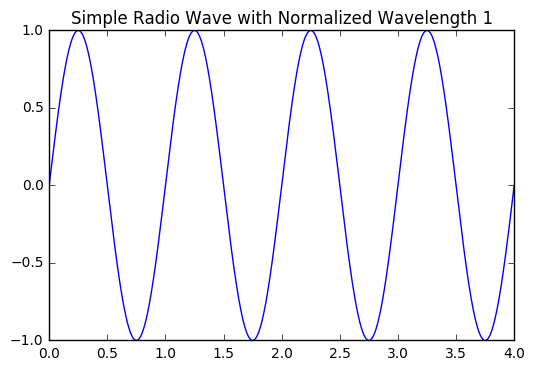

In [13]:
x = np.linspace(0, 4, 1000)            # Plot from 0 to 4, in 1000 steps
radio = np.sin(x*(2*np.pi))  # Create a wave with a wavelength of 1
plt.plot(x, radio)
plt.title("Simple Radio Wave with Normalized Wavelength 1")

Of course, our wavelength is not, in fact, 1.  The RF transmitter in the EMDrive is running at 1937MHz.  Let's match units here!

In [3]:
frequency_mhz = 1937
wavelength_cm = speed_of_light / frequency_mhz / 1000 / 1000 * 100
print wavelength_cm

15.4771532266


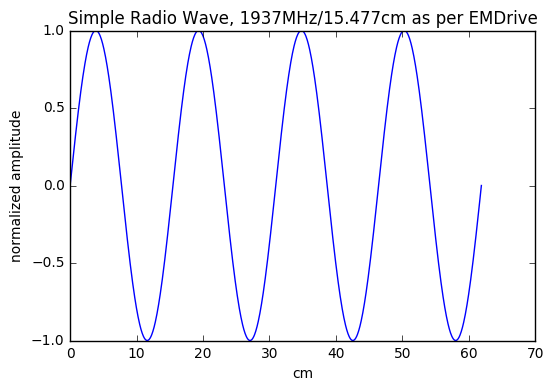

In [17]:
x = np.linspace(0, 4*wavelength_cm, 1000)            # Plot from 0 to 4*wavelength_cm, in 1000 steps
radio = np.sin(x*(2*np.pi)/wavelength_cm)  # Create a wave with a wavelength of wavelength_cm
plt.plot(x, radio)
plt.xlabel("cm")
plt.ylabel("normalized amplitude")
plt.title("Simple Radio Wave, 1937MHz/15.477cm as per EMDrive")


Now, here's where things get interesting.  Our transmitter and receiver are actually 22.7cm apart.  What an interesting distance!  Let's take a closer look at it.

In [5]:
engine_gap_cm = 22.7
print engine_gap_cm / wavelength_cm
print wavelength_cm / engine_gap_cm

1.46667799095
0.681812917473


I don't know about you, but when I see anything close to 1.5x or 0.66x in the context of any sort of wave whatsoever, the Jaws music starts playing, but with lyrics...phase shift...phase shift...

Let's take a look at what Alice and Bob (our erstwhile transmitter and receiver pair) are receiving, from the same time frame.

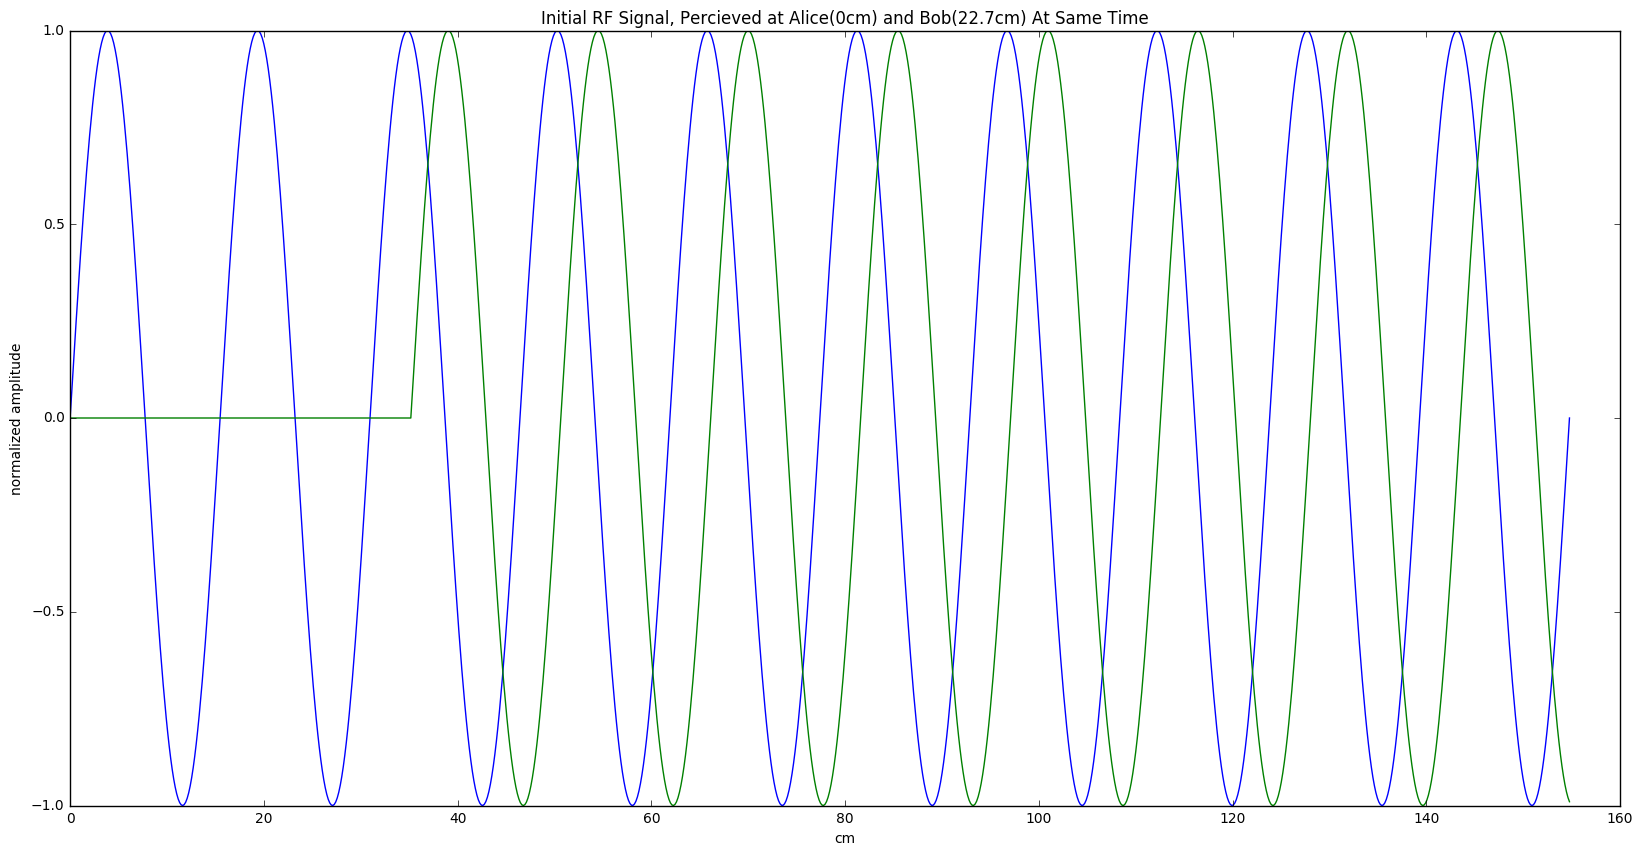

In [19]:

alice_frame = pd.DataFrame()
bob_frame = pd.DataFrame()

depth = 1000
waves = 10
gap = int(engine_gap_cm * waves)

x = np.linspace(0, waves*wavelength_cm, depth)            # Plot from 0 to 4*wavelength_cm, in 1000 steps
radio = np.sin(x*(2*np.pi)/wavelength_cm)  # Create a wave with a wavelength of wavelength_cm
alice_frame['alice']=radio
bob_frame['alice']=radio   # just a stub to fill in 1000 entries
bob_frame['alice'][0:gap]=0
bob_frame['alice'][gap:]=radio[:-gap]

plt.figure(figsize=(20,10))
plt.plot(x, alice_frame['alice'])
plt.plot(x, bob_frame['alice'])
plt.xlabel("cm")
plt.ylabel("normalized amplitude")
plt.title("Initial RF Signal, Percieved at Alice(0cm) and Bob(22.7cm) At Same Time")



Of course, "same timeframes" don't really exist.  In Bob's "reference" frame, he's receiving RF from Alice, and it's causing his electrons to oscillate in tune with what he perceives to be Alice's electrons.  That's why he's able to receive a signal from Alice -- his electrons are moving with hers.

Of course, that's exactly how magnetism works -- two objects have large numbers of electrons moving in sync with one another.  What a coincidence, that an electromagnetic wave (RF) might create a reaction both electrical and magnetic.

Anyway, from Bob's reference frame, his electrons are perfectly in tune with Alice's, and like charges repel.  This isn't a surprising reaction at all, in a world where we know photon pressure exists.  (I could have this backwards -- perhaps this side attracts instead of repels, perhaps this effect is electrical instead of magnetic -- but bear with me.)

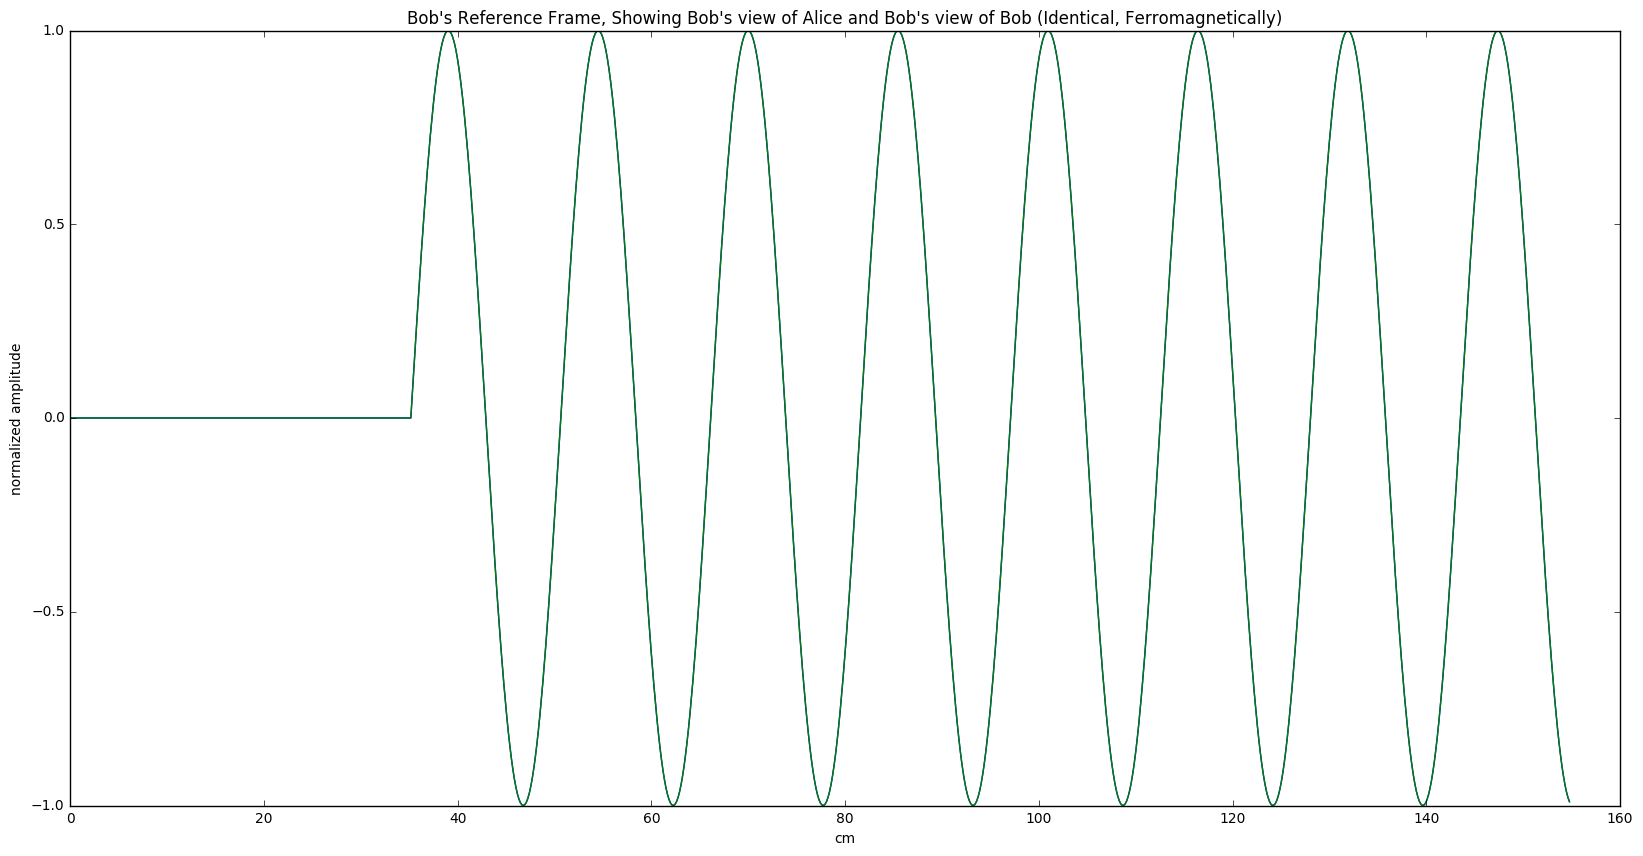

In [21]:
plt.figure(figsize=(20,10))
bob_frame['bob']=bob_frame['alice']
plt.plot(x, bob_frame['alice'])
plt.plot(x, bob_frame['bob'])
plt.xlabel("cm")
plt.ylabel("normalized amplitude")
plt.title("Bob's Reference Frame, Showing Bob's view of Alice and Bob's view of Bob (Identical, Ferromagnetically)")



The key is that, while no matter what Alice sends to Bob, Bob will align with, but *whatever Bob does orient to has to be transmitted back to Alice*.  And that too requires 22.7 cm of travel!  What will Alice see, returned from Bob?

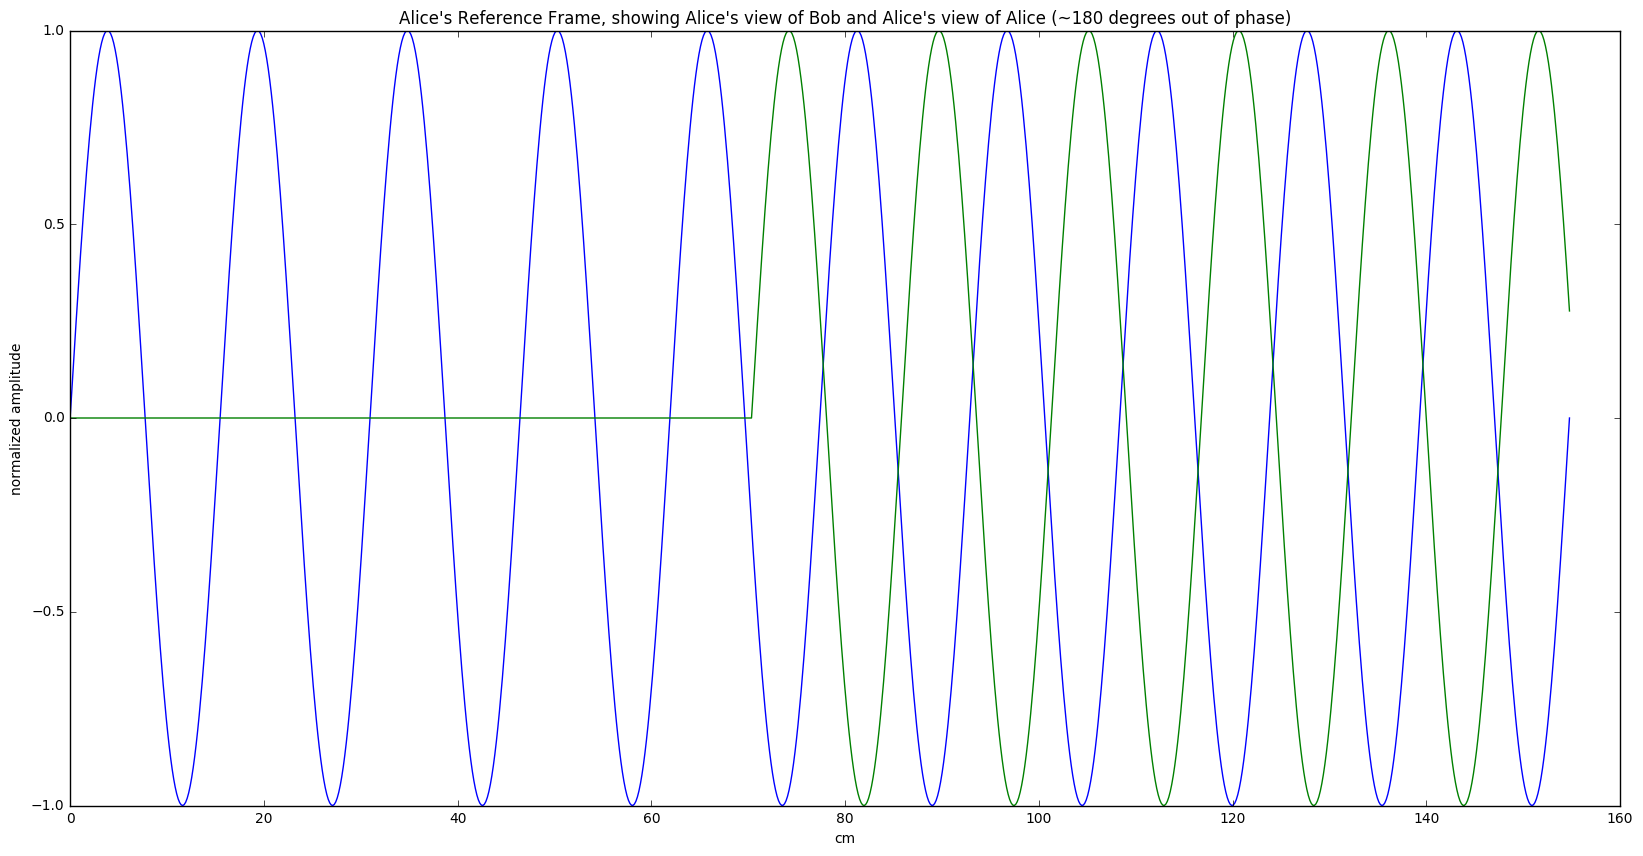

In [23]:
plt.figure(figsize=(20,10))
alice_frame['bob']=radio # just a stub to fill in 1000 entries
alice_frame['bob'][0:gap]=0
alice_frame['bob'][gap:gap*2]=0
alice_frame['bob'][gap*2:]=radio[:-gap*2]

plt.plot(x, alice_frame['alice'])
plt.plot(x, alice_frame['bob'])
plt.xlabel("cm")
plt.ylabel("normalized amplitude")
plt.title("Alice's Reference Frame, showing Alice's view of Bob and Alice's view of Alice (~180 degrees out of phase)")



Will you look at that!  According to Alice, she and Bob are 180 degrees out of phase.  But according to Bob, Alice and him are perfectly synchronized!  What does this mean, in terms of magnetic forces?  Well, such things reduce to m1*m2, so Bob oscillates between zero and one (repelling):

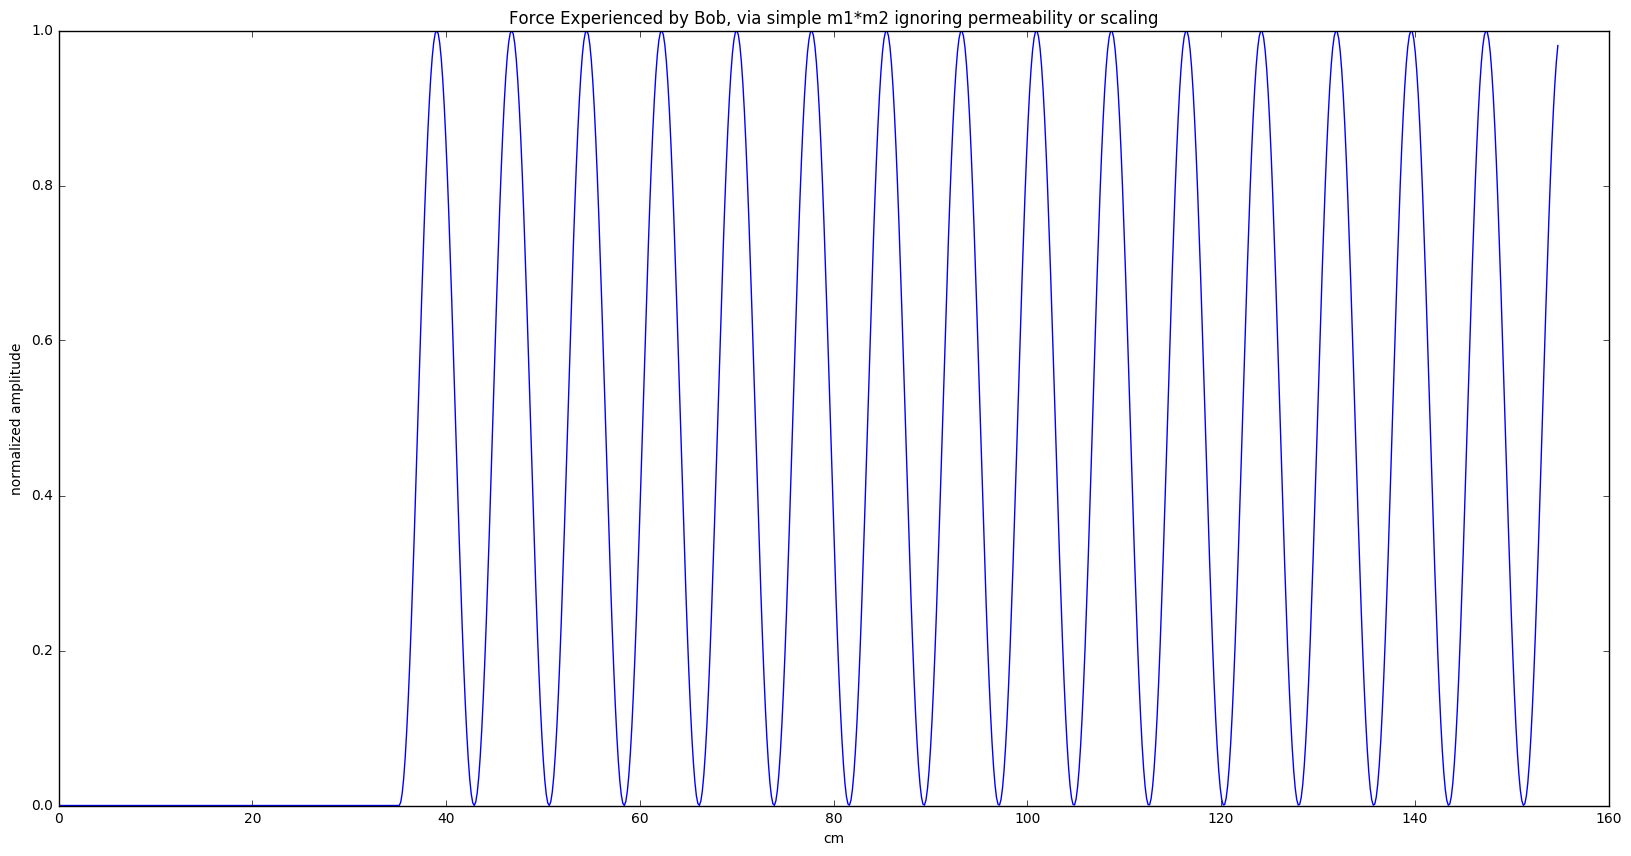

In [24]:
plt.figure(figsize=(20,10))
bob_force = bob_frame['alice']*bob_frame['bob']
plt.plot(x, bob_force)
plt.xlabel("cm")
plt.ylabel("normalized amplitude")
plt.title("Force Experienced by Bob, via simple m1*m2 ignoring permeability or scaling")


While Alice oscillates between 0 and -1 (attracting).

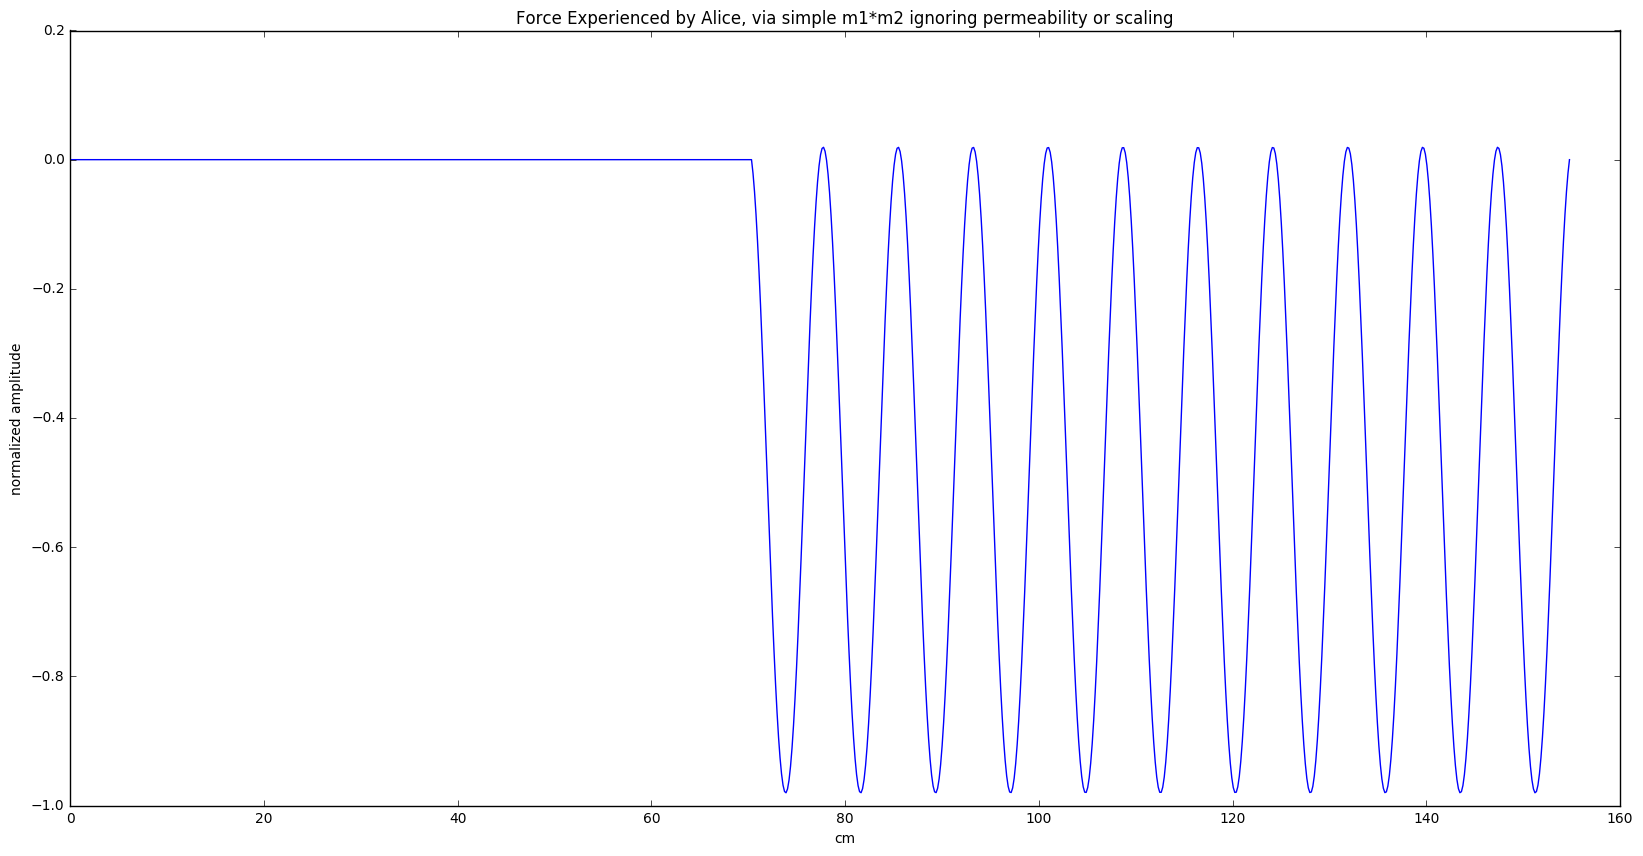

In [25]:
plt.figure(figsize=(20,10))
alice_force = alice_frame['alice']*alice_frame['bob']
plt.plot(x, alice_force)
plt.xlabel("cm")
plt.ylabel("normalized amplitude")
plt.title("Force Experienced by Alice, via simple m1*m2 ignoring permeability or scaling")

Now, we've got to add these forces to end up at a final force vector.  If they were bound to one another (imagine a girder linking two electromagnets), and were both repelling eachother with a force of 1, we would negate one of the vectors (since it's pushing in the opposite direction), compute 1+(-1), and end up with net force of 0.

This case is of course a little different, and indeed, we end up with a shockingly flatline vector for our closed system, at 98% efficiency.

# THIS IS THE GRAPH.  THIS RIGHT HERE.  THIS IS AWESOME.  STILL PROBABLY WRONG.  I KNOW THIS.  BUT AWESOME.

0.980544072202


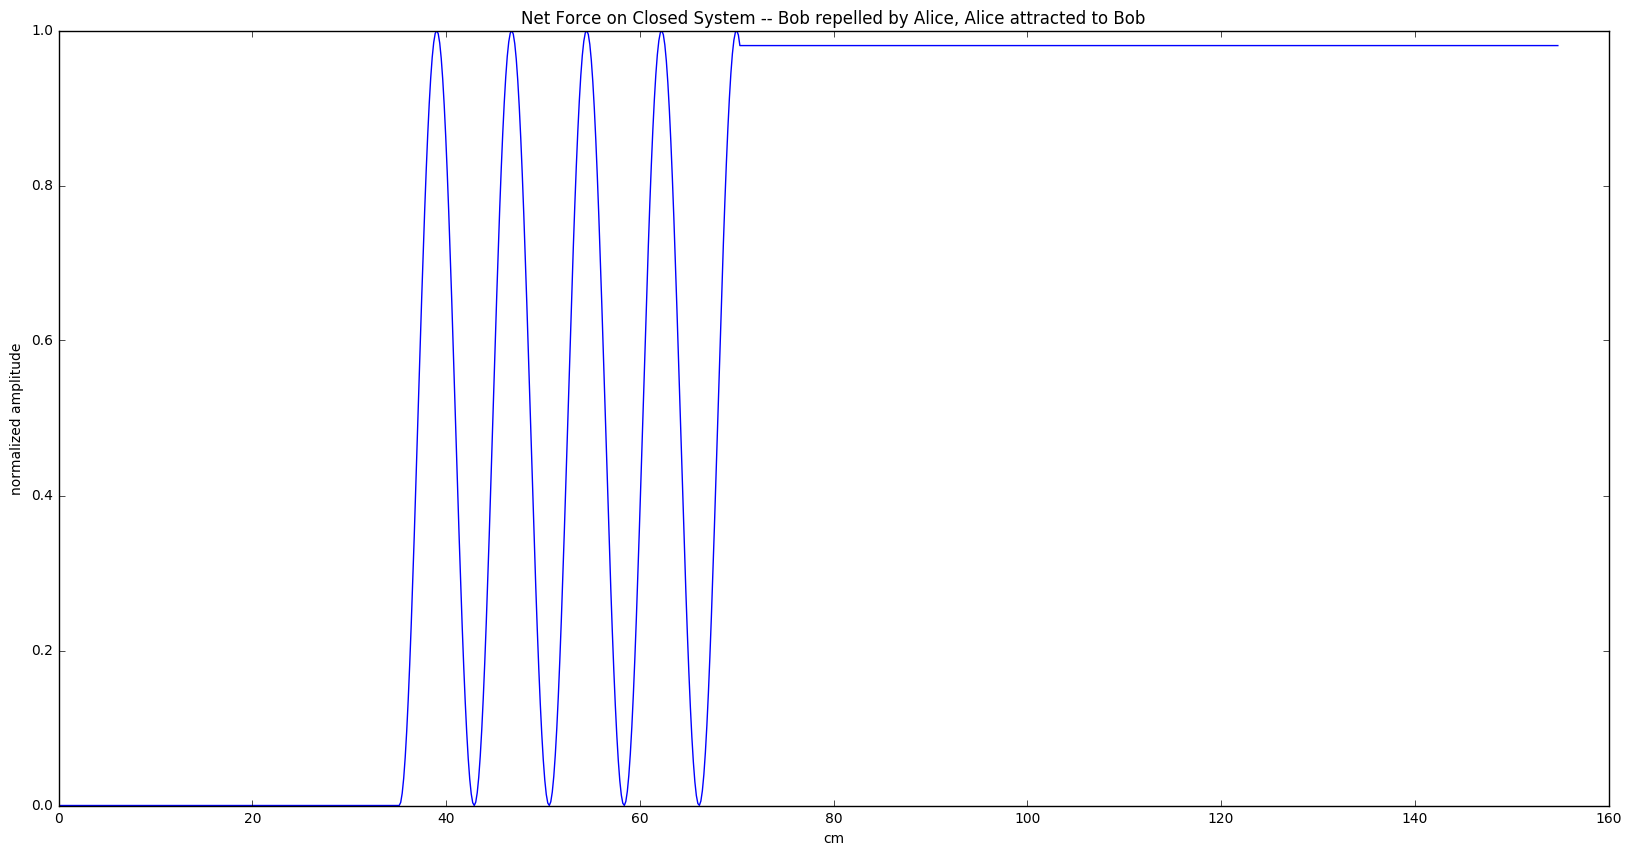

In [26]:
plt.figure(figsize=(20,10))
bob_force = bob_frame['alice']*bob_frame['bob']
alice_force = -(alice_frame['alice']*alice_frame['bob']) # if there's a fatal bug, it's right here
force_vector = alice_force + bob_force
plt.plot(x, force_vector)
plt.xlabel("cm")
plt.ylabel("normalized amplitude")
plt.title("Net Force on Closed System -- Bob repelled by Alice, Alice attracted to Bob")
print np.average(force_vector[800:])


What about different lengths?  Glad you asked!

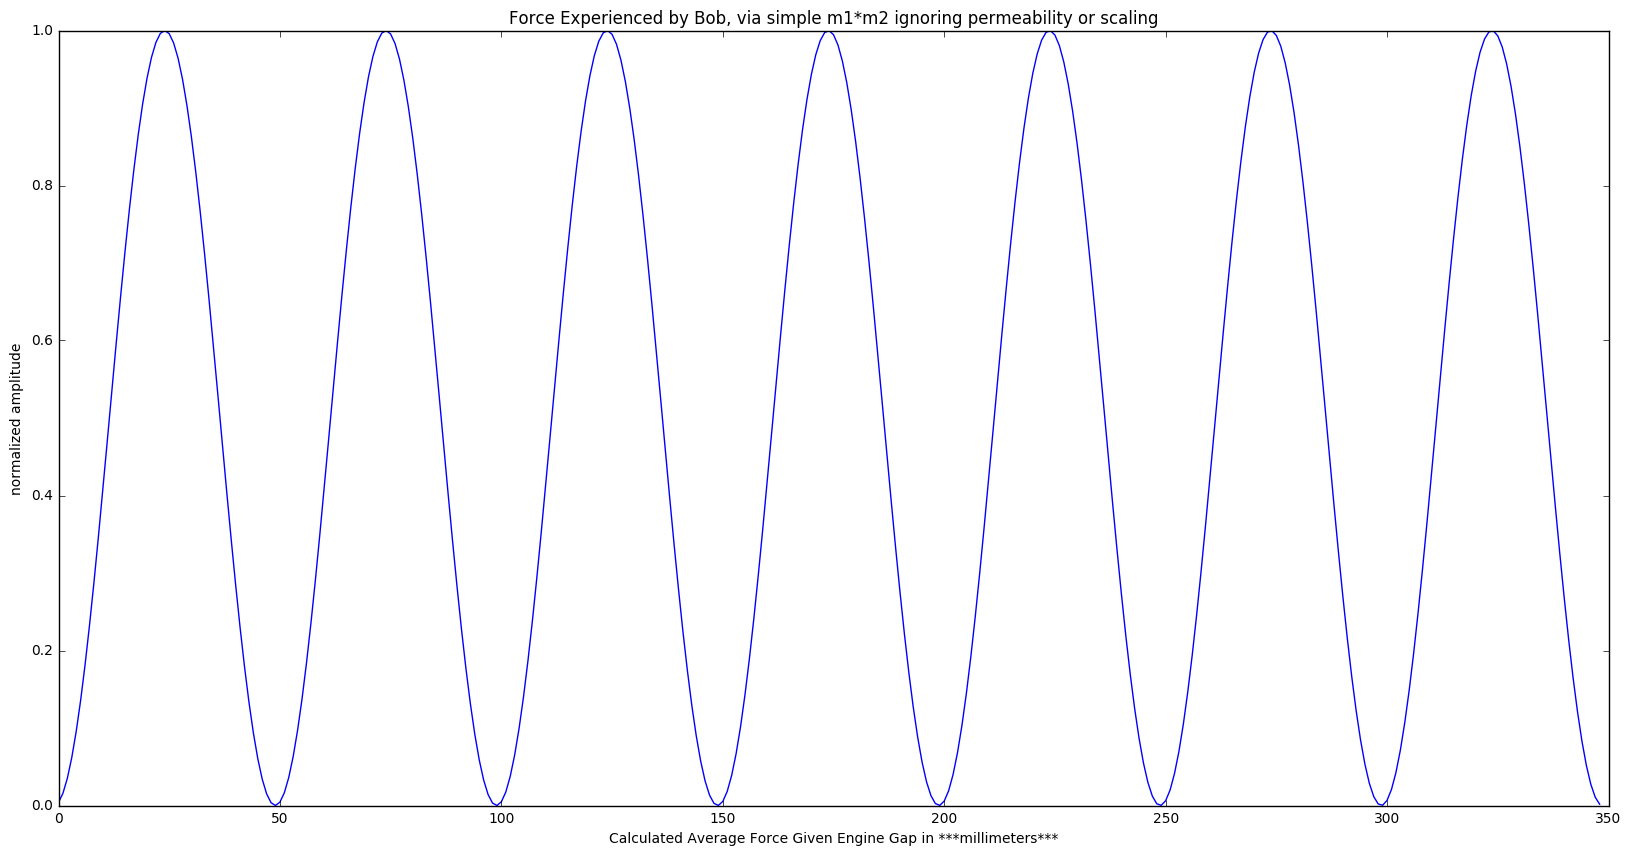

In [28]:
def make_emdrive(engine_gap_cm,return_force_vector=False):
    frequency_mhz = 1937
    wavelength_cm = speed_of_light / frequency_mhz / 1000 / 1000 * 100
    x = np.linspace(0, 4*wavelength_cm, 1000)            # Plot from 0 to 4*wavelength_cm, in 1000 steps
    radio = np.sin(x*(2*np.pi)/wavelength_cm)  # Create a wave with a wavelength of wavelength_cm
    alice_frame = pd.DataFrame()
    bob_frame = pd.DataFrame()

    depth = 1000
    waves = 10
    gap = int(engine_gap_cm * waves)

    x = np.linspace(0, waves*wavelength_cm, depth)            # Plot from 0 to 4*wavelength_cm, in 1000 steps
    radio = np.sin(x*(2*np.pi)/wavelength_cm)  # Create a wave with a wavelength of wavelength_cm
    alice_frame['alice']=radio
    bob_frame['alice']=radio   # just a stub to fill in 1000 entries
    bob_frame['alice'][0:gap]=0
    bob_frame['alice'][gap:]=radio[:-gap]

    bob_frame['bob']=bob_frame['alice']
    alice_frame['bob']=radio # just a stub to fill in 1000 entries
    alice_frame['bob'][0:gap]=0
    alice_frame['bob'][gap:gap*2]=0
    alice_frame['bob'][gap*2:]=radio[:-gap*2]
    
    bob_force = bob_frame['alice']*bob_frame['bob']
    alice_force = -(alice_frame['alice']*alice_frame['bob'])
    force_vector = alice_force + bob_force
    if return_force_vector: return(force_vector)
    else: return np.average(force_vector[900:]) # OK, yes, this gets buggy as engine_gap_cm gets too big, XXX fix
#    return (np.average(force_vector[800:]))

out=[]
for i in range(1,350): 
    out.append(make_emdrive(i/10.0))
    
plt.figure(figsize=(20,10))
plt.xlabel("Calculated Average Force Given Engine Gap in ***millimeters***") # must fix
plt.ylabel("normalized amplitude")
plt.title("Force Experienced by Bob, via simple m1*m2 ignoring permeability or scaling")
plt.plot(out)

So, in what should be surprising to nobody, 22.7cm (or around 227 in the above graph -- I'm still figuring matplotlib out) is at some sort of peak thrust.  And in this graph, we end up with a falsifiable prediction:  Whatever effect is seen, should have some periodic effect on strength every 5cm even after factoring out exponential falloff.

# Consequences

Again, this is most likely inaccurate.  But let's be clear here:

1. Conservation of Energy is maintained.  If Alice and Bob were electromagnets that fired up opposing fields in picoseconds, blasting apart in opposite directions, nobody would blink.  If they smashed into eachother from a distance, fragmenting or heating or melting apart on impact, still no big deal.  If (Feynman forbid) this actually worked, and the system started moving, the energy wouldn't be infinite.  It's not free to generate all that RF.  It wouldn't dissipate either.  It'd just become kinetic, potential energy, released on impact with your friendly neighborhood asteroid.
2. The Speed of Light is maintained.  Conservation of Linear and Angular Momentum is important, but if I can only have two of Energy, Speed of Light, and the Momentums...well, I'm going to sit and spin.  I've got lots of ways to transmute types of energy, but no free sources of it and absolutely no ansibles.
3. Heh Elon, enjoy Mars :)

OK, yes, probably a number of theories would have to be updated.  And maybe someone will reply to this post with a straight up proof of infinite energy after all, in which case I'll happily update.

Worth noting that basically any system that allows two magnets to experience asymmetric forces is an instant engine to Mars -- there's all these super cool models of magnets bolo-ing through space, donuts pulling eachother, etc.  It's a big deal to lose these symmetries.  However...have you seen magnetic fields?  Now insert serious relativistic effects and cheap ways to introduce them.  If anything's going to admit this sort of chaos, the poorly understood, difficult to model, and surprisingly powerful realm of magnetics is my best bet.

Oh, there's no reason Bob needs to be oscillating his magnetic field under the power of Alice...there's a lot of really solid falsifiable predictions that flow from all this.

# Follow Up

The *right* library to simulate the magnetics here is probably [OOMMFC](http://oommfc.readthedocs.io/en/stable/ipynb/standard_problem5.html).  [Fatiando a Terra](http://www.fatiando.org/) also looks excellent.  The real thing to do is to expand the simulation past 1D, and to really integrate forces properly (rather than just assuming permeability doesn't exist and ignoring scaling factors).

Plus, I've made this *giant* assumption that there's any kinetic attraction whatsoever between antennas at any distance, just because their electrons are (uncontroversially) wiggling under RF oscillation.  The amount of force, relative to the energy going in, isn't much.  We're certainly not getting more acceleration, than the power we're shoving into the system.  Oh well, anything can get hotter.

# So again, why be wrong?

If there's any construction which doesn't end physics, there's probably much better responses to the EMDrive than mine.  Alright, smart guys...you can probably keep all your physics, if you just knock out the oppositional constraint.  Suppose EMDrive actually works.  What's a better theory than mine?

Feel free to send feedback to @dakami or dan@doxpara.com!